In [0]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [4]:
%cd /gdrive/My\ Drive/Deeplearning

/gdrive/My Drive/Deeplearning


In [0]:
bank_df = pd.read_csv("bank.csv")

In [6]:
bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
bank_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [0]:
# There is no null values in the data.

In [0]:
X = bank_df.iloc[:,3:13]
Y = bank_df['Exited']

In [24]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [0]:
X = pd.get_dummies(X, drop_first=True)

In [40]:
X.shape

(10000, 11)

In [28]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [0]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=7)

In [0]:
import seaborn as sns

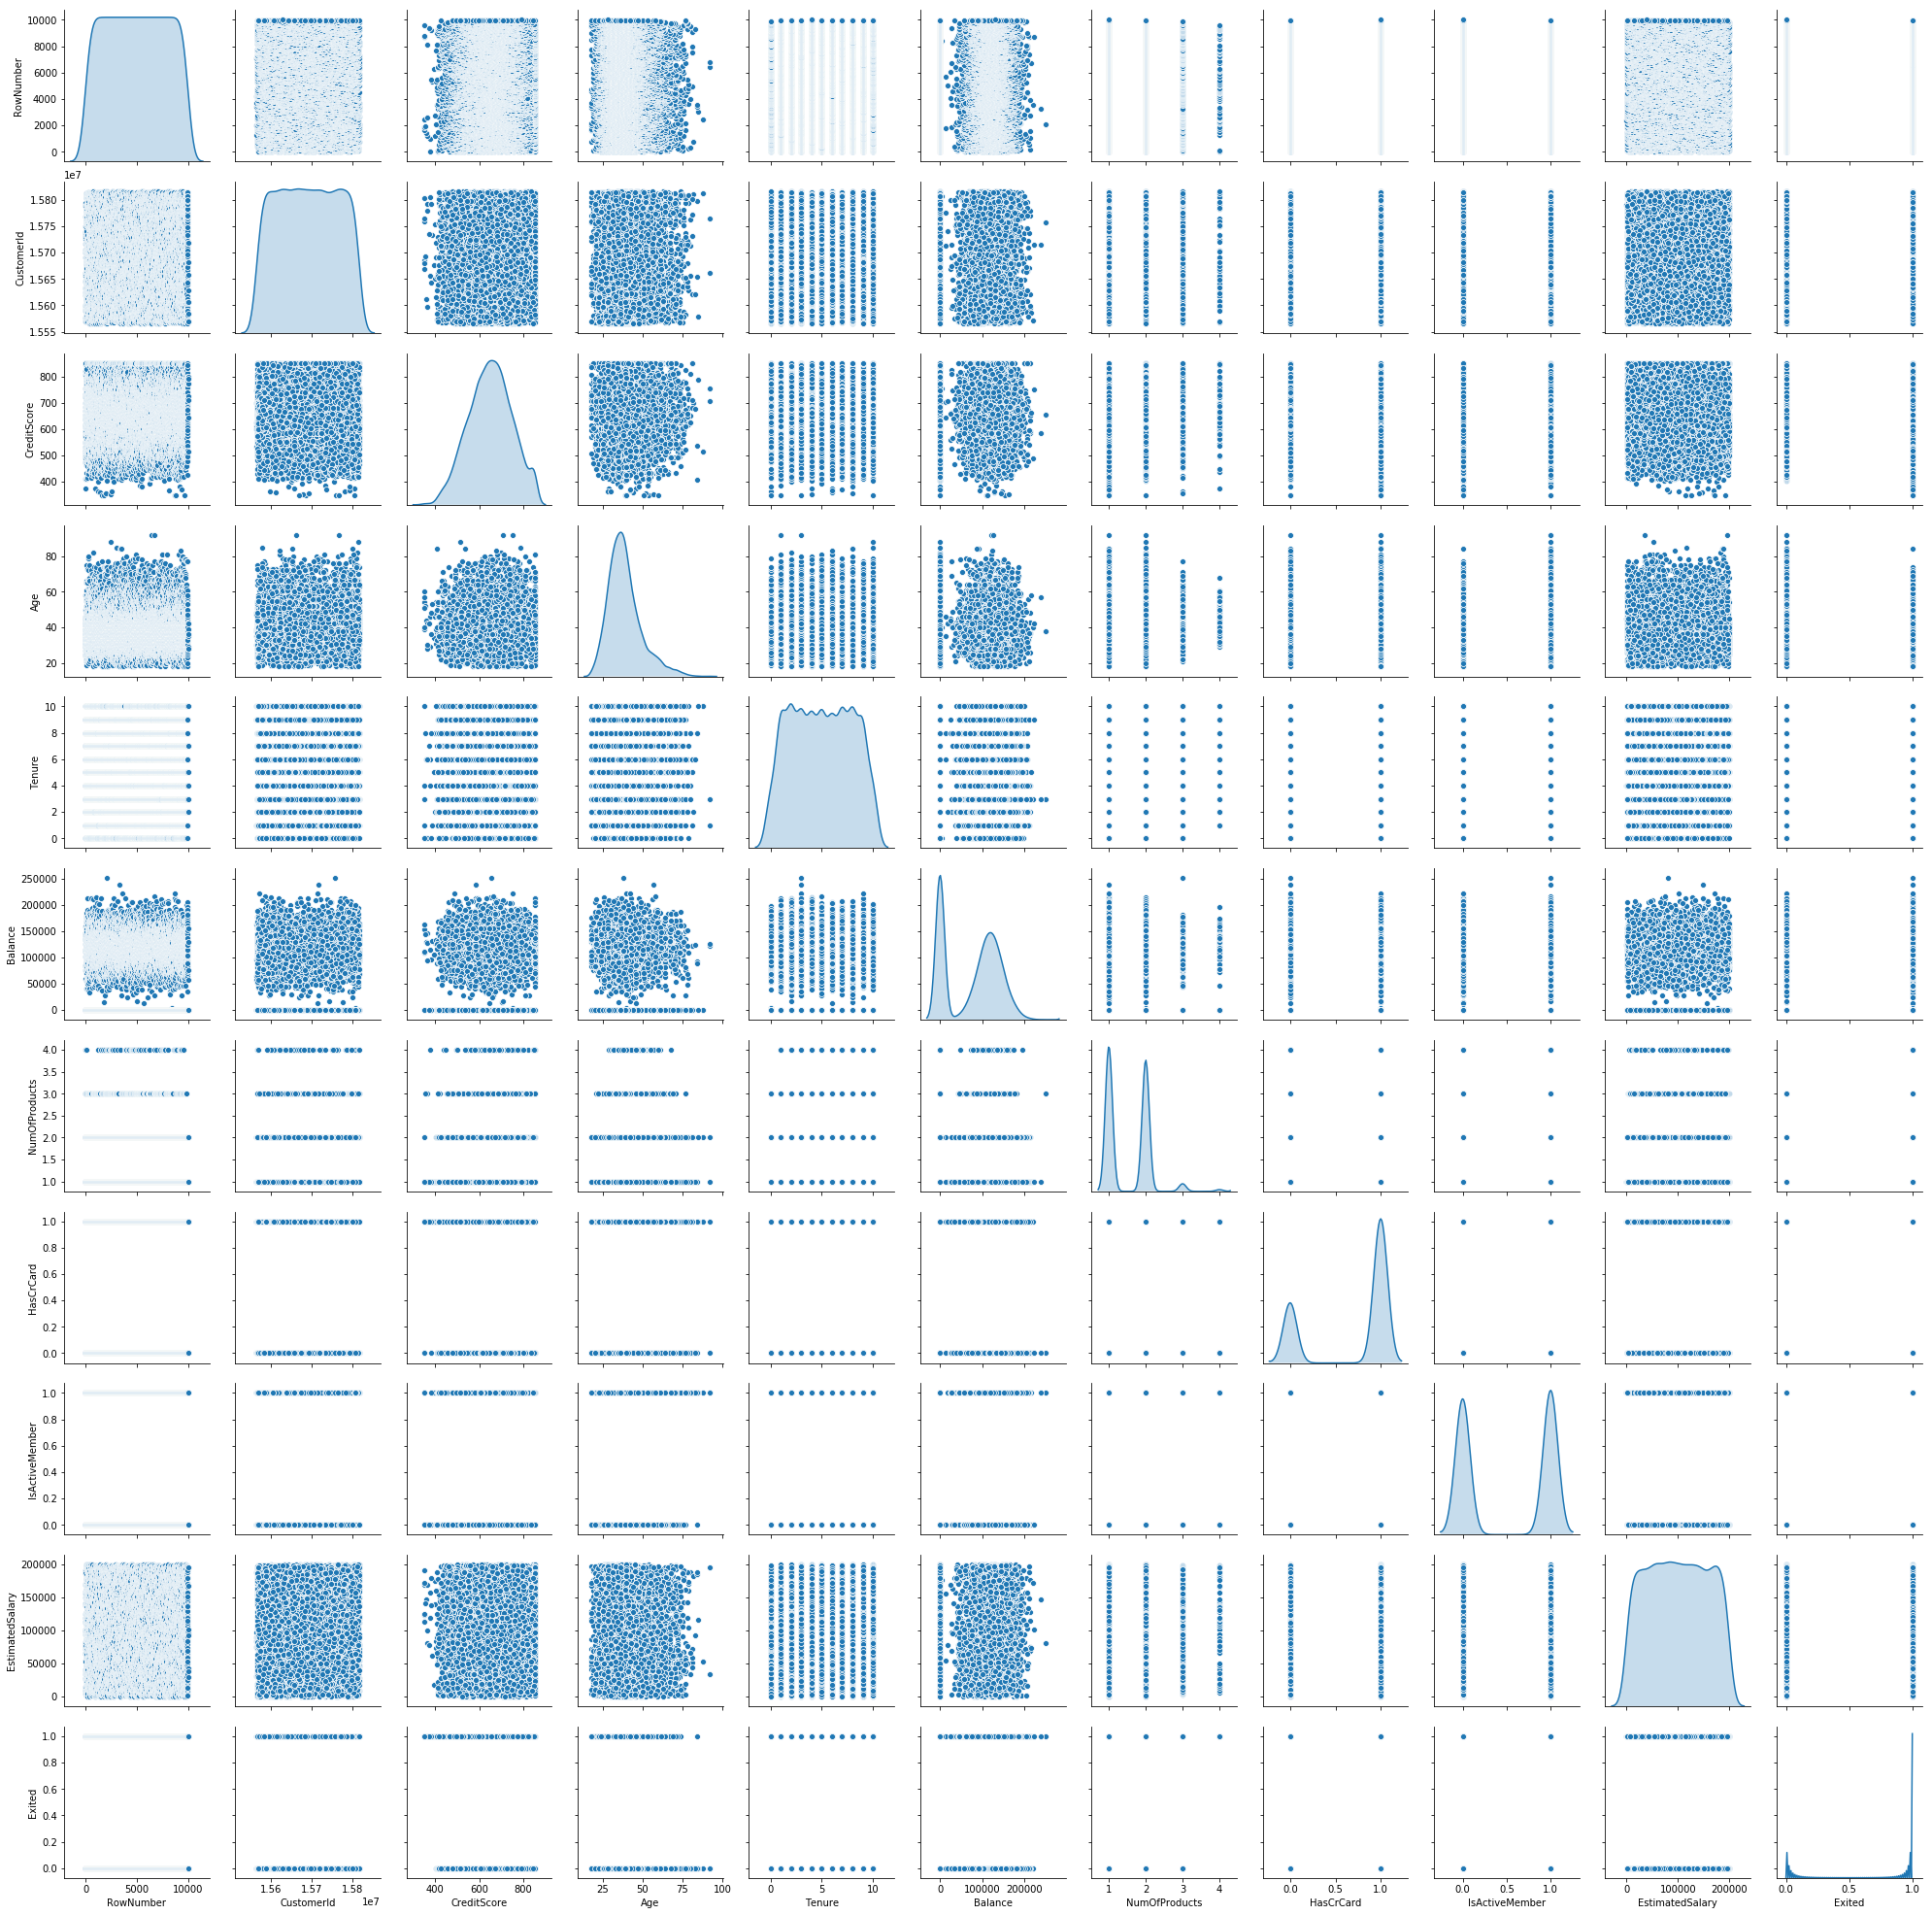

In [32]:
sns.pairplot(bank_df, diag_kind = 'kde')

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [0]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense



In [42]:
model = Sequential()
model.add(Dense(6, activation = 'relu', input_dim = 11, kernel_initializer='uniform'))
model.add(Dense(6, activation = 'relu', kernel_initializer='uniform'))
model.add(Dense(1, activation = 'sigmoid', kernel_initializer='uniform'))

W0901 10:06:07.673150 140576375089024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0901 10:06:07.689794 140576375089024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [43]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

W0901 10:06:40.068233 140576375089024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0901 10:06:40.100280 140576375089024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3657: The name tf.log is deprecated. Please use tf.math.log instead.

W0901 10:06:40.107095 140576375089024 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [61]:
model.fit(Xtrain, ytrain, batch_size=10, epochs=100)

Epoch 1/100
7000/7000 [==============================] - 1s 105us/step - loss: 0.3822 - acc: 0.8476
Epoch 2/100
7000/7000 [==============================] - 1s 108us/step - loss: 0.3514 - acc: 0.8573
Epoch 3/100
7000/7000 [==============================] - 1s 107us/step - loss: 0.3466 - acc: 0.8556
Epoch 4/100
7000/7000 [==============================] - 1s 105us/step - loss: 0.3440 - acc: 0.8587
Epoch 5/100
7000/7000 [==============================] - 1s 105us/step - loss: 0.3424 - acc: 0.8603
Epoch 6/100
7000/7000 [==============================] - 1s 108us/step - loss: 0.3416 - acc: 0.8574
Epoch 7/100
7000/7000 [==============================] - 1s 103us/step - loss: 0.3413 - acc: 0.8587
Epoch 8/100
7000/7000 [==============================] - 1s 106us/step - loss: 0.3399 - acc: 0.8583
Epoch 9/100
7000/7000 [==============================] - 1s 103us/step - loss: 0.3406 - acc: 0.8587
Epoch 10/100
7000/7000 [==============================] - 1s 103us/step - loss: 0.3395 - acc: 0.8590

In [0]:
ypred=model.predict(Xtest)

In [0]:
y_pred=ypred > 0.5


In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
print(cm)
print (((cm[0][0]+cm[1][1])*100)/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]), '% of testing data was classified correctly')

[[2297   98]
 [ 332  273]]
85.66666666666667 % of testing data was classified correctly


In [47]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [54]:
from collections import Counter
overSampler = RandomOverSampler(random_state=42)
train_x_resample,train_y_resample = overSampler.fit_resample(Xtrain,ytrain)
# before resampling the number of each catogorical
print(Counter(ytrain).items())
# After resampling the number of each catogorical
print(Counter(train_y_resample).items())
smoteEnn = SMOTEENN(random_state=7) 
train_x_resample1,train_y_resample1 = smoteEnn.fit_resample(Xtrain,ytrain)
# before resampling the number of each catogorical
print(Counter(ytrain).items())
# After resampling the number of each catogorical
print(Counter(train_y_resample1).items())

dict_items([(0, 5568), (1, 1432)])
dict_items([(0, 5568), (1, 5568)])
dict_items([(0, 5568), (1, 1432)])
dict_items([(0, 3670), (1, 4716)])


In [52]:
model.fit(train_x_resample, train_y_resample, batch_size=10, epochs=100)

Epoch 1/100
11136/11136 [==============================] - 1s 106us/step - loss: 0.5425 - acc: 0.7280
Epoch 2/100
11136/11136 [==============================] - 1s 104us/step - loss: 0.5331 - acc: 0.7356
Epoch 3/100
11136/11136 [==============================] - 1s 105us/step - loss: 0.5207 - acc: 0.7455
Epoch 4/100
11136/11136 [==============================] - 1s 106us/step - loss: 0.4870 - acc: 0.7666
Epoch 5/100
11136/11136 [==============================] - 1s 104us/step - loss: 0.4670 - acc: 0.7773
Epoch 6/100
11136/11136 [==============================] - 1s 104us/step - loss: 0.4611 - acc: 0.7783
Epoch 7/100
11136/11136 [==============================] - 1s 107us/step - loss: 0.4591 - acc: 0.7782
Epoch 8/100
11136/11136 [==============================] - 1s 106us/step - loss: 0.4575 - acc: 0.7796
Epoch 9/100
11136/11136 [==============================] - 1s 104us/step - loss: 0.4572 - acc: 0.7799
Epoch 10/100
11136/11136 [==============================] - 1s 105us/step - loss: 

In [53]:
model.fit(train_x_resample1, train_y_resample1, batch_size=10, epochs=100)

Epoch 1/100
8386/8386 [==============================] - 1s 106us/step - loss: 0.2991 - acc: 0.8761
Epoch 2/100
8386/8386 [==============================] - 1s 107us/step - loss: 0.2879 - acc: 0.8766
Epoch 3/100
8386/8386 [==============================] - 1s 107us/step - loss: 0.2843 - acc: 0.8779
Epoch 4/100
8386/8386 [==============================] - 1s 105us/step - loss: 0.2823 - acc: 0.8788
Epoch 5/100
8386/8386 [==============================] - 1s 109us/step - loss: 0.2809 - acc: 0.8797
Epoch 6/100
8386/8386 [==============================] - 1s 106us/step - loss: 0.2803 - acc: 0.8794
Epoch 7/100
8386/8386 [==============================] - 1s 108us/step - loss: 0.2796 - acc: 0.8794
Epoch 8/100
8386/8386 [==============================] - 1s 107us/step - loss: 0.2789 - acc: 0.8803
Epoch 9/100
8386/8386 [==============================] - 1s 108us/step - loss: 0.2785 - acc: 0.8815
Epoch 10/100
8386/8386 [==============================] - 1s 104us/step - loss: 0.2775 - acc: 0.8808

In [0]:
# Using SMOTE technique to overcome the imbalance of the predict class gives a better accuracy.

In [0]:
ypred = model.predict(Xtest)

In [56]:
ypred


array([[9.15056467e-01],
       [1.03198588e-02],
       [1.35239065e-02],
       ...,
       [1.44809484e-04],
       [1.39279962e-02],
       [7.02086627e-01]], dtype=float32)

In [58]:
y_pred = (ypred > 0.5)
print(y_pred )

[[ True]
 [False]
 [False]
 ...
 [False]
 [False]
 [ True]]


In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
print(cm)


[[1745  650]
 [ 130  475]]


In [60]:
print (((cm[0][0]+cm[1][1])*100)/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]), '% of testing data was classified correctly')


74.0 % of testing data was classified correctly
